<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week4_MeanEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation of the mean

This is a quick review of the mean estimation, it's variance, and confidence intervals.


## The mean estimator

Suppose that $X$ is distributed according to some unkown distribution but with finite first and second moments.  We then make $N$ IID draws of $X$ and call the sum of these $Y$.

That is,

$$Y = X_1 + X_2 + \cdots + X_N = \sum_{k=1}^N X_k$$


What can we say about $Y$?  It is easy to see that:

1.  $\mathrm{E}(Y) = N\mu_X$

also, because the $X_k$'s are independent.

2. $\mathrm{Var}(Y) = N \sigma_X^2$



If we wanted to estimate mean of $X$ from the sample, we would simply rescale $Y$ by $\frac{1}{N}$ to get the estimator

$$\bar{X} = \frac{1}{N}Y =\frac{1}{N} \sum_{k=1}^N X_k$$

This estimator is unbiased because (by construction)

$$\mathrm{E}(\bar{X}) = \frac{1}{N}N\mu_X = \mu_X$$

Furthermore, we can also calculate the variance of this estimator.

$$\mathrm{Var}(\bar{X}) = \frac{1}{N^2} N \sigma_X^2 = \frac{1}{N}\sigma_X^2$$




Note that we don't know much about the distribution of $X$ beyond that it has finite first and second moments. We also don't we know much about $\bar{X}$ except that it is an unbiased estimator of $\mu_X$ and (importantly) that its variance $\propto \frac{1}{N}$ meaning that as sample sizes increase, the estimator "closes" in on the true value $\mu_X$.  This means via Chebyshev's inequality that the estimator is consistent.

Note that these statements are true without invoking the Central Limit Theorem or assuming anything is a normal distribution.   




## The Normal Case


If the underlying distribution is normal, we can say more about the distribution of $\bar{X}$.  In particular, the normal distribution is rather unusial in a good way because it has the property that the sum of two normal distributions is also a normal distribution (this is not something to take for granted, few distributions behave so nicely!).

But if you know the mean and variance of normal distribution, you know the distribution.  This means that if

$X \sim \mathcal{N}(\mu_X, \sigma^2_X)$ 

then

$\bar{X} \sim \mathcal{N}\left(\mu_X, \frac{1}{N} \sigma^2_X \right)$


If we happen to know $\sigma_X$, then we can constuct confidence intervals for $\mu_X$. For example, if we want a $95\%$ CI, we find $z_{.025} = \Phi^{-1}(.975)$ and our interval will be

$$\left(\bar{X} - z_{.025} \frac{\sigma_X}{\sqrt{N}}, \bar{X} + z_{.025} \frac{\sigma_X}{\sqrt{N}}\right)$$


Or, more generally, if we wish to have confidence with error level $\alpha$, we find $z_{\frac{\alpha}{2}} = \Phi^{-1}\left(1-\frac{\alpha}{2}\right)$

and our CI is

$$\left(\bar{X} - z_{\frac{\alpha}{2}} \frac{\sigma_X}{\sqrt{N}}, \bar{X} + z_{\frac{\alpha}{2}} \frac{\sigma_X}{\sqrt{N}}\right)$$


#### Quick side comment

What we initially know is that

$$\mathrm{Pr}\left(\bar{X} \in (\mu_X - z_{\frac{\alpha}{2}} \sigma_X, \mu_X+ z_{\frac{\alpha}{2}} \sigma_X)\right) = 1- \alpha$$

but a little algrebra gets us to the previous conclusion.



Of course, there is an issue: We wouldn't typically just happen to know $\sigma_X$.  So if we want a confidence interval for $\mu_X$, we are going to have to estimate $\sigma_X$ (or $\sigma_X^2$).

### Estimating $\sigma_X^2$.

We still assume that $X$ is normal with unknown mean and variance.  How shall we estimate $\sigma^2_X$?

If we calculate the second moment of our sample, we are calculating

$$m_2 = \frac{1}{N}\sum_{k=1}^N X_k^2$$

The random variable $X^2$ is not normal, but it does have a mean which we call the second moment.  Indeed, $\mathrm{E}(X^2) = \sigma_X^2 + \mu_X^2$

Hence, 

$$\mathrm{E}(m_2) = \sigma_X^2 + \mu_X^2$$

meaning that $m_2$ is an unbiased estimator of the second moment.

This motivates the following estimator of for the variance:

$$\hat{\sigma}^2_X  = m_2 - \bar{X}^2$$

Is this unbiased?  

Well, 

$$\mathrm{E}\left( \hat{\sigma}^2_X    \right) =\mathrm{E}\left(  m_2 - \bar{X}^2 \right)\\
= \mathrm{E}(m_2) -\mathrm{E}\left(  \bar{X}^2 \right) \\
=\sigma_X^2 + \mu_X^2 -\mathrm{E}\left(  \bar{X}^2 \right) $$


So we need to look at $\mathrm{E}\left(  \bar{X}^2 \right)$

$$\mathrm{E}\left(  \bar{X}^2 \right) = \frac{1}{N^2}\mathrm{E}\left(  (X_1 + X_2 + \cdots + X_n)^2 \right)\\
= \frac{1}{N^2}\left(\mathrm{E}\left(\sum_{k=1}^N X_k^2   \right) + \mathrm{E}\left(\sum_{k\neq j}2 X_kX_j   \right)      \right)\\
= \frac{1}{N^2}\left(\sum_{k=1}^N\mathrm{E}\left( X_k^2   \right) + \sum_{k< j}\mathrm{E}\left(2 X_kX_j   \right)      \right)\\
= \frac{1}{N^2}\left( N(\sigma_X^2 + \mu_X^2) + 2\frac{N(N-1)}{2}\mu_X^2\right)\\
=\frac{\sigma_X^2}{N} + \mu_X^2$$


From which we conclude that

$$\mathrm{E}\left( \hat{\sigma}^2_X    \right) = \sigma_X^2 - \frac{1}{N}\sigma_X^2\\
= \frac{N-1}{N} \sigma_X^2$$

We see that this estimator is not unbiased but it asymptotically unbiased.


However, the simple adjusment:  $s_X^2 = \frac{N}{N-1} \hat{\sigma}_X^2$ leaves with an unbiased estimator of the variance and you have probably seen this referred to as the "sample variance".

### Confidence Interval

So what happens if we construct our confidence interval using our estimator $s_X$ in place of the unknown parameter $\sigma_X$? Is this CI

$$\left(\bar{X} - z_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}, \bar{X} + z_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}\right)$$

still valid?

The anwser is no.

However, all is not lost.  It turns out that the Random Variable $\frac{\bar{X} - \mu_X}{\frac{s_X}{\sqrt{N}}}$ is distributed according to the Student T distribution with $\nu = N-1$. 

Therefore, we can correctly state the confidence interval as

$$\left(\bar{X} - t_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}, \bar{X} + t_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}\right)$$

where

$t_{\frac{\alpha}{2}} = T^{-1}\left(1-\frac{\alpha}{2}; \nu = N-1\right)$

and

$T(x;\nu)$ is the CDF of the Student T distribution.

This is not approximate, but "exactly" true given the assumptions.







#### Example 1

We take $X$ to be normally distributed with $\mu_X = 100$ and $\sigma_X = 20$.  

We then take samples of size $N = 10$ and calculate $Y = \frac{\bar{X} - \mu_X}{\frac{s_X}{\sqrt{N}}}$ for each sample of 10.  

We will do this $M = 1000$ times.  According to theory, $Y$ should follow the T distrinbution with $N-1$ degrees freedom. Let's find out.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss


In [ ]:
M = 1000
N = 10
mu = 100
sigma = 20

X = ss.norm.rvs(size = [M,N], loc = mu, scale = sigma )

Xbars = np.mean(X, axis = 1) # we now have 1000 estimates of mu based on samples of 5

s = np.std(X, axis =1,ddof =1 )  # the ddof =1 changes N to N-1 in the denominator

Y = (Xbars -mu)/(s/np.sqrt(N)) 


Now we take a look at the histogram and compare to what we "know" it should be.

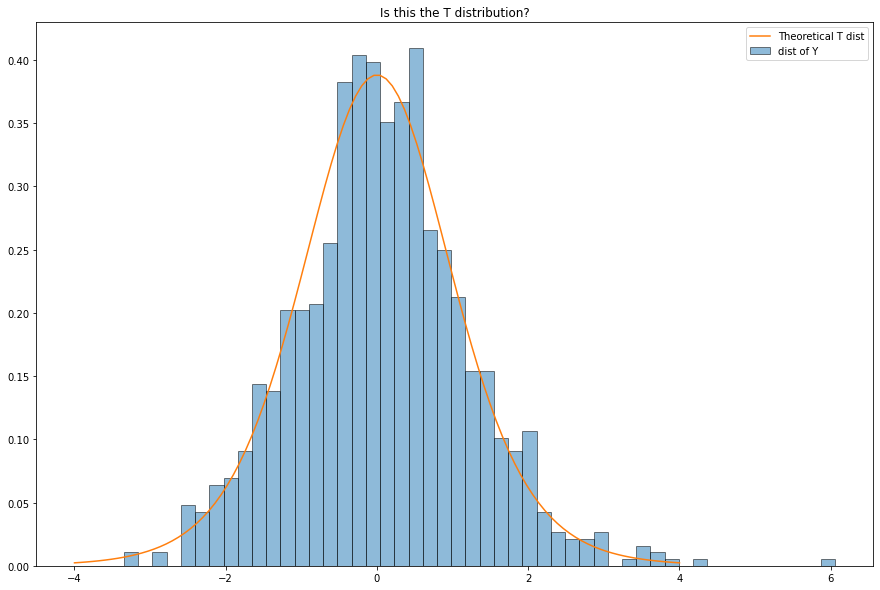

In [ ]:
y = np.linspace(-4,4, 100)
plt.figure(figsize = (15,10))

plt.hist(Y, bins = 50, alpha= .5, edgecolor = "black", density = True, label = "dist of Y")

plt.plot(y, ss.t.pdf(y, df = N-1), label = "Theoretical T dist")

plt.legend()

plt.title("Is this the T distribution?")


plt.show()

Recall, another way to compare is via a QQ plot

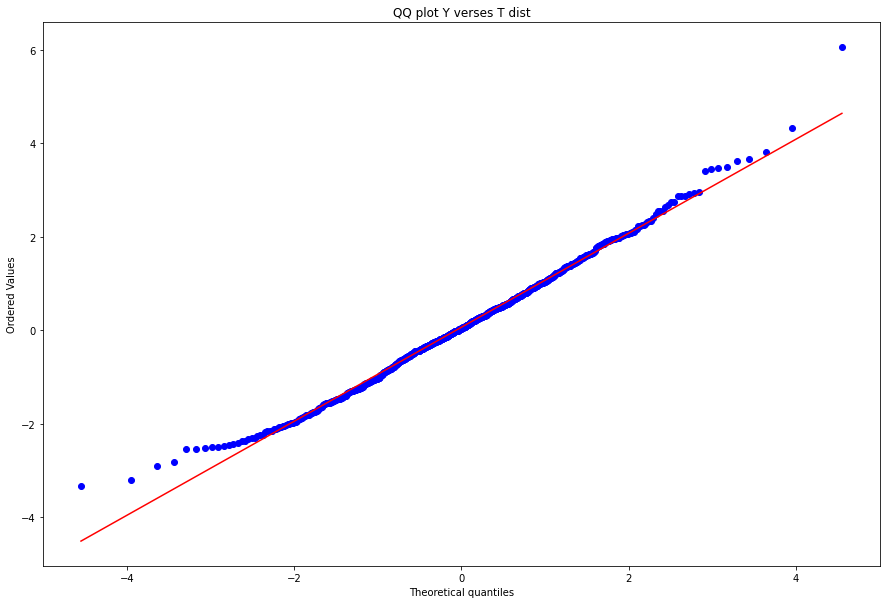

In [ ]:
fig, ax  = plt.subplots( figsize=(15, 10))

ss.probplot(Y, dist="t", sparams = N-1, plot = ax)

plt.title("QQ plot Y verses T dist")

plt.show()

Of course, the plot doesn't prove the theory, but it doesn't contradict it. 

If we desired a statistical test, we could observe that, under our assumptions,  $U = T(Y)$ will be uniform and therefore $\Phi^{-1}(U) = \Phi^{-1}(T(Y))$ is $N(0,1)$. Hence we apply Shapiro-Wilk.

In [ ]:
U = ss.t.cdf(Y, df = N-1)
Z = ss.norm.ppf(U)
print(Z.mean(), Z.var())

ss.shapiro(Z)

0.05075897487447624 1.0094446159536388


(0.997395932674408, 0.10960327833890915)

This doesn't prove that theory is correct, but it is evidence.

Continuing the example further, we could constuct $M$ confidence intervals at $\alpha = .05$.  We would expect $\mu_X$ to fall in the interval about $95\%$ of the time.  Let's see.

In [ ]:
alpha = .05
tcrit = ss.t.ppf( 1-alpha/2, df = N-1)

CI_u = Xbars + tcrit*s/np.sqrt(N)
CI_l = Xbars - tcrit*s/np.sqrt(N)


test = (CI_l < mu)  & (mu < CI_u)

test.mean()



0.954

## When $X$ is not normal

When $X$ is not normal, the above CI is not necessarily true. However, the Central Limit Theorem (CLT) comes to our rescue (a bit).   The CLT tells us that (even if $X$ is not normally distributed) as long as both first and second moments exists, then as $N\to \infty$:

$$\bar{X}  \sim \mathcal{N}\left(\mu_X, \frac{1}{N}\sigma_X^2 \right)$$


But more importantly, in this context, as $N \to \infty$:

$\frac{\bar{X} - \mu_X}{\frac{s_X}{\sqrt{N}}} \to \mathcal{T}(\nu = N-1)$


What are we to make of this?  

1. Assuming $N$ is large enough, we can still construct confidence intervals for $\mu_X$ even though $X$ itself is not normal.

2. For large $N$, the Student T converges to the normal distribution, so the CI's can be stated as


$$\left(\bar{X} - z_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}, \bar{X} + z_{\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}}\right)$$

without much harm.


This is all well and good,  but there is **BIG** caveat:  The CLT doesn't tell us how large is large enough.


Let's do an example





#### Example 2

Let $X$ be from the gamma distribution with $\alpha = 4$ and $\beta = 2$.   


We will take sample sizes of $N \in (5, 10,20, 30)$ and compare the KDE's of $Y = \frac{\bar{X} - \mu_X}{\frac{s_X}{\sqrt{N}}}$ with the corresponding student T. 


Note that under these parameter choices, $\mu_X = \alpha \beta = 8$ and $\sigma_X = \sqrt{\alpha \beta^2} = 4$




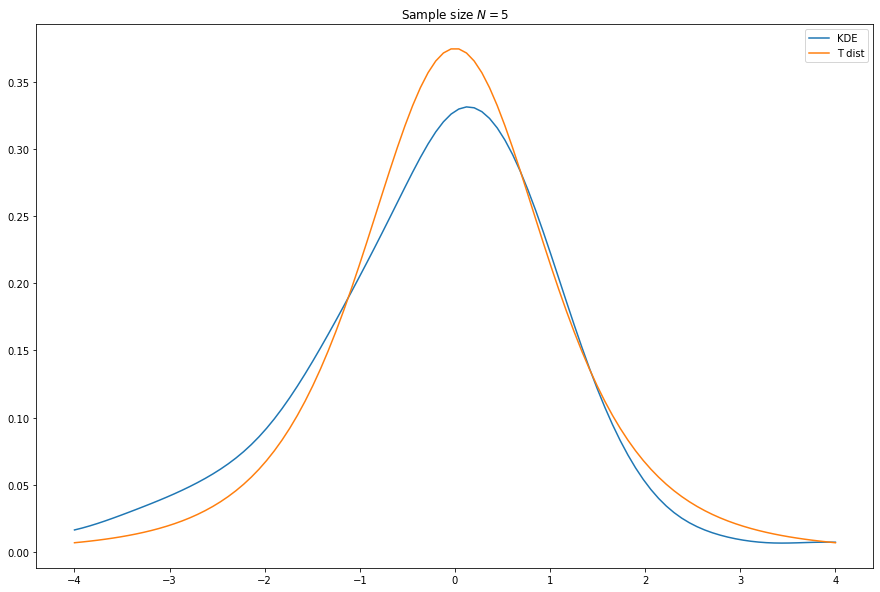

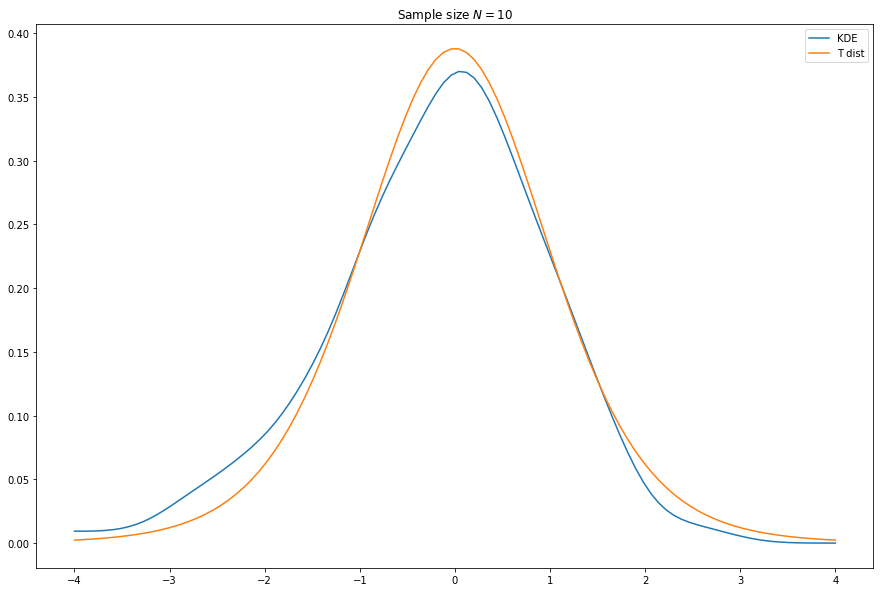

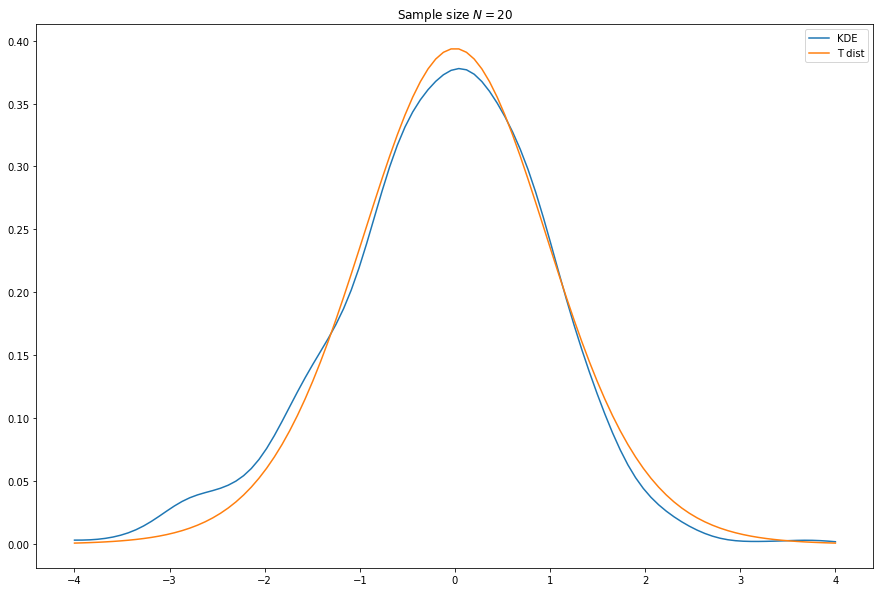

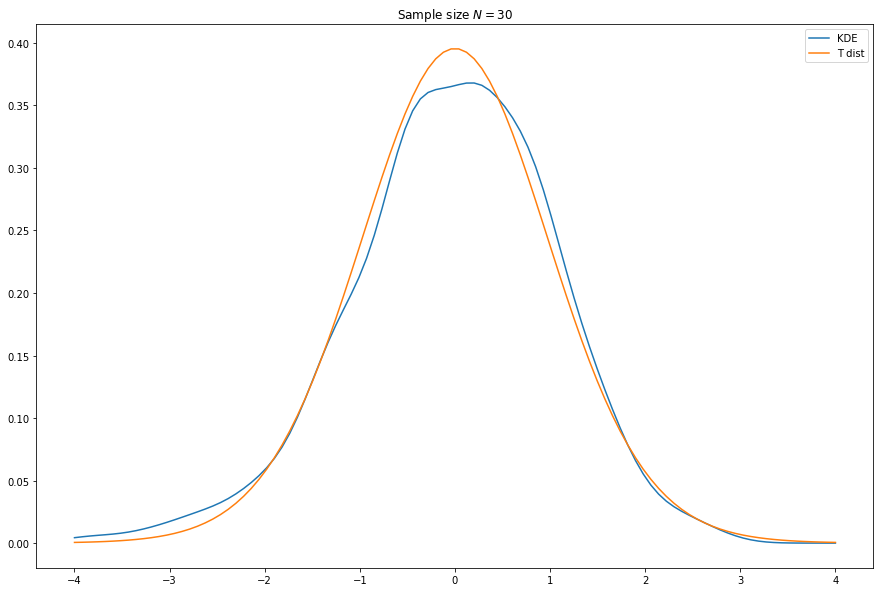

In [ ]:
M = 1000
Ns = np.array([5,10,20,30])
alpha =5
beta = 2
mu = alpha*beta
sigma = np.sqrt(alpha*beta)


Xbars = np.zeros([M,len(Ns)])
s = np.zeros([M,len(Ns)])
Y = np.zeros([M,len(Ns)])


for k,N in enumerate(Ns):
    X = ss.gamma.rvs(size = [M,N], a = alpha, scale = beta )
    Xbars[:,k] = np.mean(X, axis = 1)
    s[:,k] = np.std(X, axis =1,ddof =1 )
    Y[:,k] = (Xbars[:,k] -mu)/(s[:,k]/np.sqrt(N))
    


y = np.linspace(-4,4, 100)


for k, N in enumerate(Ns):
    
    plt.figure(figsize= (15,10))
    plt.plot(y, ss.gaussian_kde(Y[:,k])(y), label = "KDE")
    plt.plot(y, ss.t.pdf(y, df = N-1), label = "T dist")
    plt.legend()
    plt.title("Sample size $N = $"+str(N))
    plt.show()

    

 

So we can see that the depending on $N$, the assumption that $Y$ follows the T-distribution can be tenuous. 


Furthermore, the more $X$ is not normal, the harder it is to get there.  Consider for example if $\alpha = .1$ and $\beta =2$.  

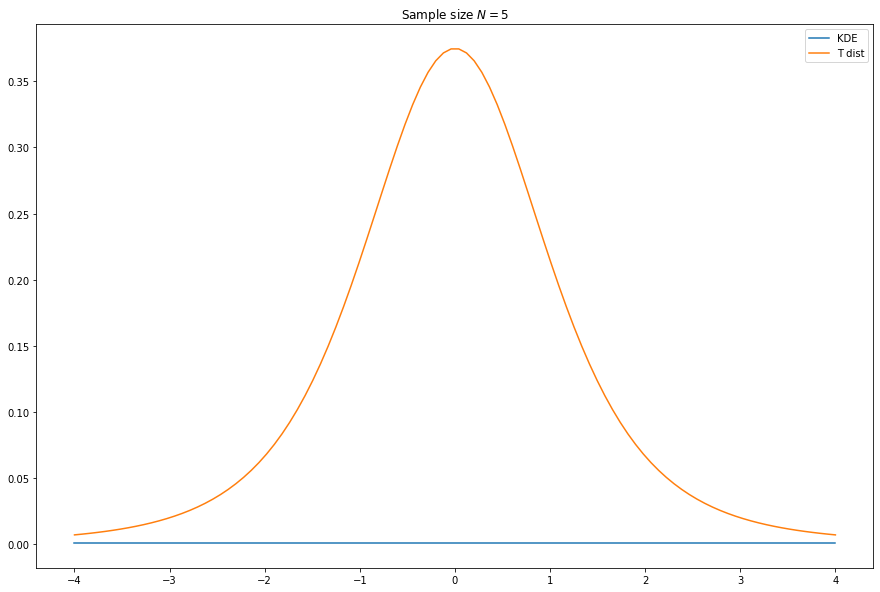

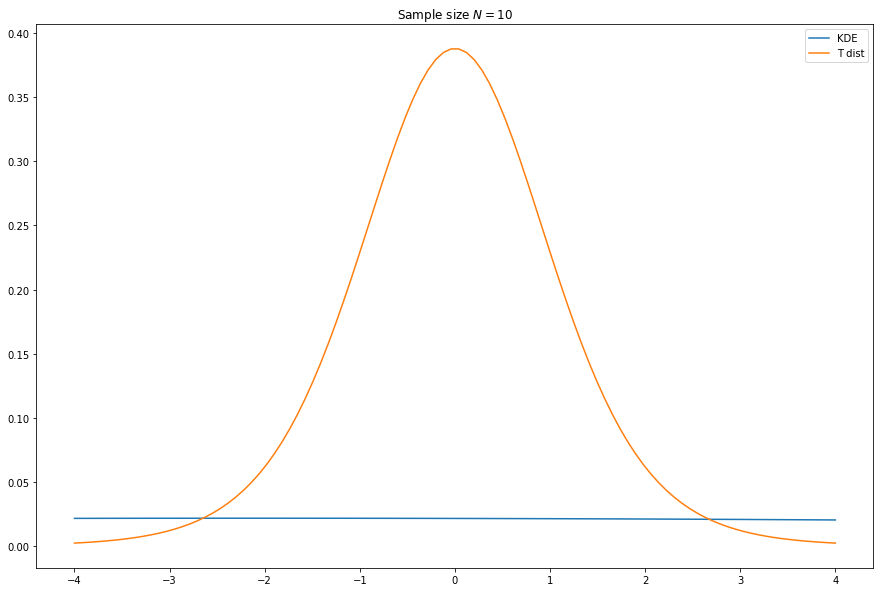

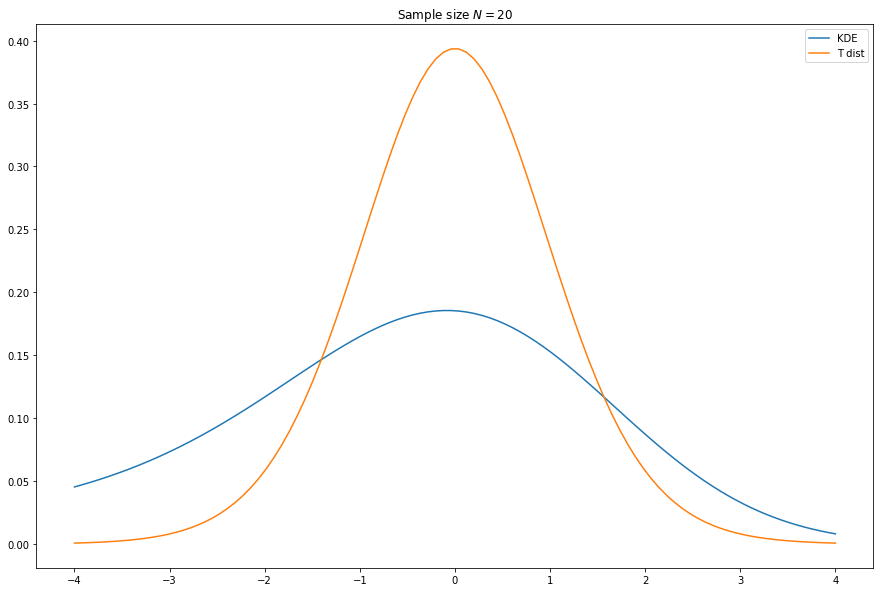

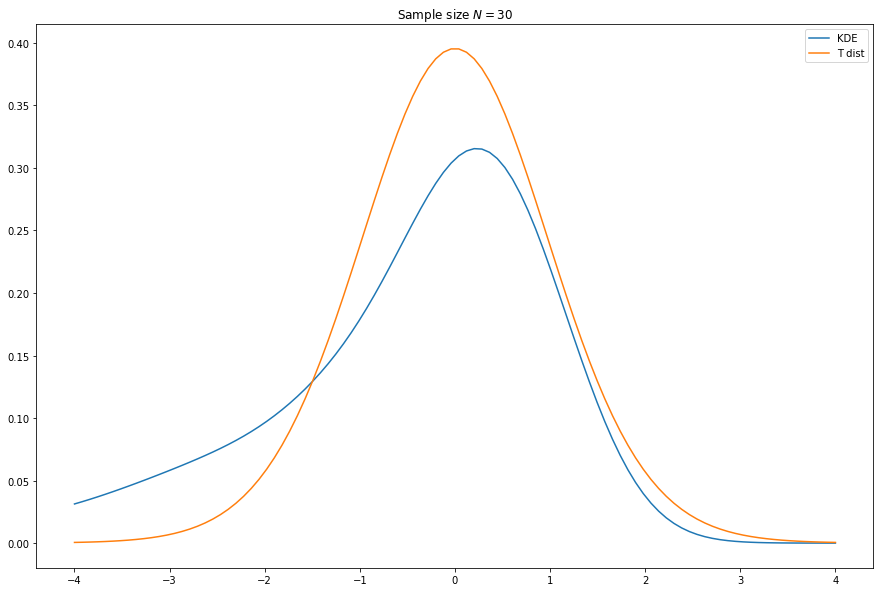

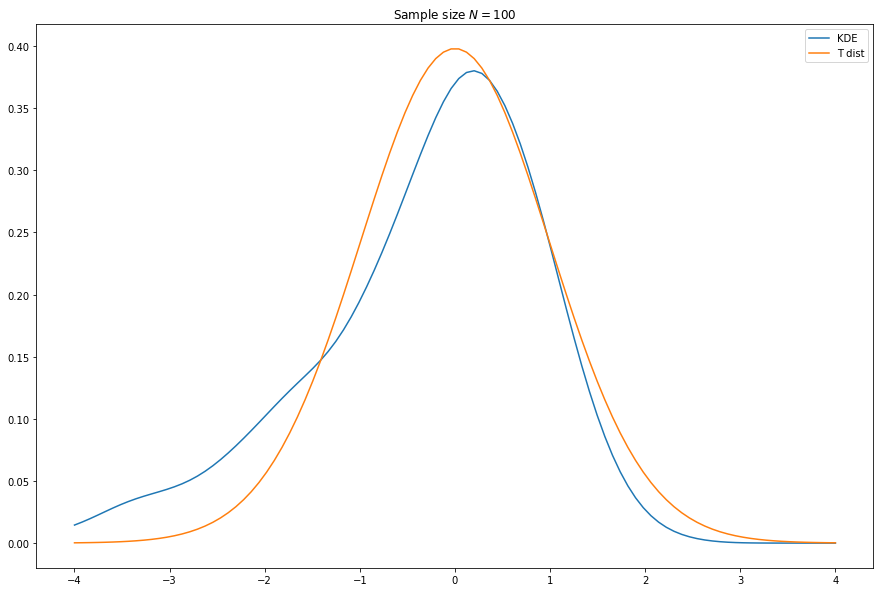

In [ ]:
M = 1000
Ns = np.array([5,10,20,30,100])
alpha =.1
beta = 2
mu = alpha*beta
sigma = np.sqrt(alpha*beta)


Xbars = np.zeros([M,len(Ns)])
s = np.zeros([M,len(Ns)])
Y = np.zeros([M,len(Ns)])


for k,N in enumerate(Ns):
    X = ss.gamma.rvs(size = [M,N], a = alpha, scale = beta )
    Xbars[:,k] = np.mean(X, axis = 1)
    s[:,k] = np.std(X, axis =1,ddof =1 )
    Y[:,k] = (Xbars[:,k] -mu)/(s[:,k]/np.sqrt(N))
    


y = np.linspace(-4,4, 100)


for k, N in enumerate(Ns):
    
    plt.figure(figsize= (15,10))
    plt.plot(y, ss.gaussian_kde(Y[:,k])(y), label = "KDE")
    plt.plot(y, ss.t.pdf(y, df = N-1), label = "T dist")
    plt.legend()
    plt.title("Sample size $N = $"+str(N))
    plt.show()

### Conclusion

We cannot completely rely on the traditional CI calculation when we don't know that the underlying distribution is "well behaved" enough.  The CLT has limitations.